# Zillow Housing Data


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading files and getting header

In [30]:
df_city = pd.read_csv("/Users/dannylo1314/Documents/Thinkful/Zillow_Data/zecon/City_time_series.csv")
list(df_city.columns.values)

['Date',
 'RegionName',
 'HomesSoldAsForeclosuresRatio_AllHomes',
 'InventorySeasonallyAdjusted_AllHomes',
 'InventoryRaw_AllHomes',
 'MedianListingPricePerSqft_1Bedroom',
 'MedianListingPricePerSqft_2Bedroom',
 'MedianListingPricePerSqft_3Bedroom',
 'MedianListingPricePerSqft_4Bedroom',
 'MedianListingPricePerSqft_5BedroomOrMore',
 'MedianListingPricePerSqft_AllHomes',
 'MedianListingPricePerSqft_CondoCoop',
 'MedianListingPricePerSqft_DuplexTriplex',
 'MedianListingPricePerSqft_SingleFamilyResidence',
 'MedianListingPrice_1Bedroom',
 'MedianListingPrice_2Bedroom',
 'MedianListingPrice_3Bedroom',
 'MedianListingPrice_4Bedroom',
 'MedianListingPrice_5BedroomOrMore',
 'MedianListingPrice_AllHomes',
 'MedianListingPrice_CondoCoop',
 'MedianListingPrice_DuplexTriplex',
 'MedianListingPrice_SingleFamilyResidence',
 'MedianPctOfPriceReduction_AllHomes',
 'MedianPctOfPriceReduction_CondoCoop',
 'MedianPctOfPriceReduction_SingleFamilyResidence',
 'MedianPriceCutDollar_AllHomes',
 'MedianPrice

# Sorting Year in date

In [88]:
df_city['Date'] = pd.to_datetime(df_city['Date'])
df_city['Year'] = df_city['Date'].apply(lambda x: x.year)


0          1996
1          1996
2          1996
3          1996
4          1996
5          1996
6          1996
7          1996
8          1996
9          1996
10         1996
11         1996
12         1996
13         1996
14         1996
15         1996
16         1996
17         1996
18         1996
19         1996
20         1996
21         1996
22         1996
23         1996
24         1996
25         1996
26         1996
27         1996
28         1996
29         1996
           ... 
4172691    2017
4172692    2017
4172693    2017
4172694    2017
4172695    2017
4172696    2017
4172697    2017
4172698    2017
4172699    2017
4172700    2017
4172701    2017
4172702    2017
4172703    2017
4172704    2017
4172705    2017
4172706    2017
4172707    2017
4172708    2017
4172709    2017
4172710    2017
4172711    2017
4172712    2017
4172713    2017
4172714    2017
4172715    2017
4172716    2017
4172717    2017
4172718    2017
4172719    2017
4172720    2017
Name: Year, Length: 4172

# Exploring median price per squarefoot of all homes

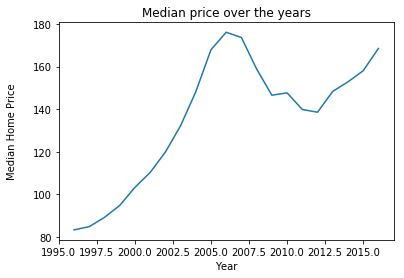

In [32]:
df_city.groupby(df_city['Year'])['MedianSoldPricePerSqft_AllHomes'].mean().plot()

plt.title('Median price over the years')
plt.ylabel('Median Home Price\n')
plt.show()

# Exploring median rental price per squartfoot of all homes

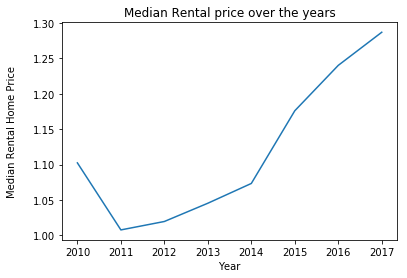

In [33]:
df_city.groupby(df_city['Year'])['MedianRentalPricePerSqft_AllHomes'].mean().plot()

plt.title('Median Rental price over the years')
plt.ylabel('Median Rental Home Price\n')
plt.show()

### Show turnover in histogram

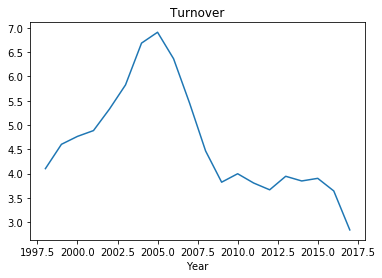

In [34]:
df_city.groupby(df_city['Year'])['Turnover_AllHomes'].mean().plot()
plt.title('Turnover')
plt.show()


## The data seems to suggest that the median selling price per square foot and the median rental price per square foot decrease and rises together. Let's further explore below

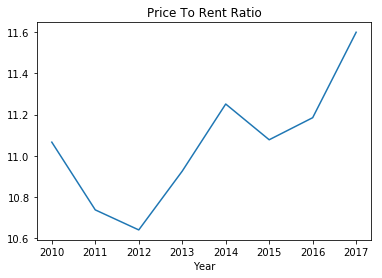

In [35]:
# Normalize. use plt.plot() overlap price to rent ratio plot to median rental price plot

df_city.groupby(df_city['Year'])['PriceToRentRatio_AllHomes'].mean().plot()
plt.title('Price To Rent Ratio')
plt.show()

# Exploring changes in price for different home types

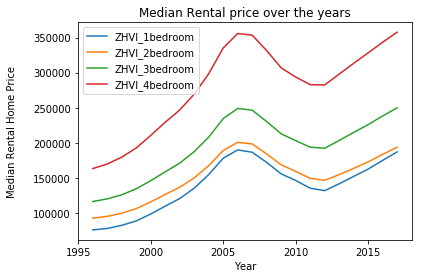

In [36]:
df_city.groupby(df_city['Year'])['ZHVI_1bedroom','ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom'].mean().plot()

plt.title('Median Rental price over the years')
plt.ylabel('Median Rental Home Price\n')
plt.show()

### The data suggests that all four categories of home rise and fall about the same

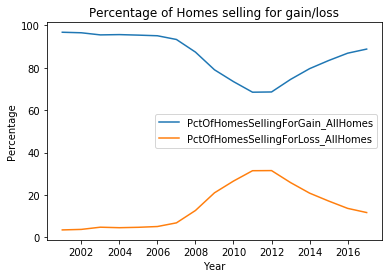

In [37]:
df_city.groupby(df_city['Year'])[ 'PctOfHomesSellingForGain_AllHomes','PctOfHomesSellingForLoss_AllHomes'].mean().plot()

plt.title('Percentage of Homes selling for gain/loss')
plt.ylabel('Percentage')
plt.show()

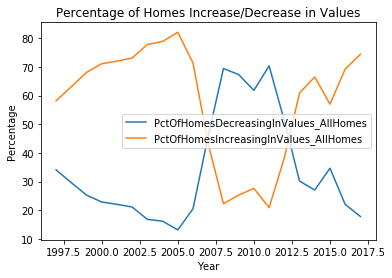

In [59]:
df_city.groupby(df_city['Year'])['PctOfHomesDecreasingInValues_AllHomes','PctOfHomesIncreasingInValues_AllHomes'].mean().plot()

plt.title('Percentage of Homes Increase/Decrease in Values')
plt.ylabel('Percentage')
plt.show()

### Data suggests that all home values start to increase after 2011. As percentage of homes increasing in value starts to rise at 2011. On the other hand, the percentage of homes decreasing in value decreases at 2011. It took around 5 years since the 2008 housing crisis for the housing market to stabilize. 

# Selecting only cities in Los Angeles

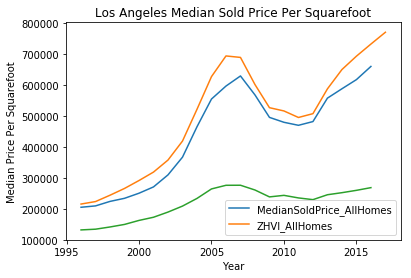

In [122]:
pd.options.mode.chained_assignment = None

df_city_la = df_city[df_city['RegionName'].str.contains('los_angeles')]

df_city_la.groupby(df_city_la['Year'])['MedianSoldPrice_AllHomes','ZHVI_AllHomes',].mean().plot()
df_city.groupby(df_city['Year'])['MedianSoldPrice_AllHomes'].mean().plot()
plt.title('Los Angeles Median Sold Price Per Squarefoot')
plt.ylabel('Median Price Per Squarefoot')
plt.show()

#### Los Angeles Price is extremly high compared to the rest of the the country

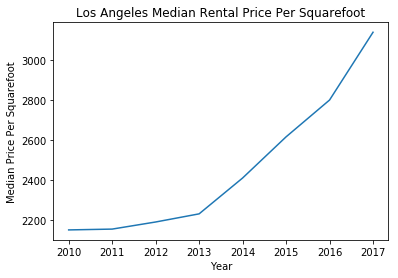

In [68]:
pd.options.mode.chained_assignment = None

df_city_la.groupby(df_city_la['Year'])['MedianRentalPrice_AllHomes'].mean().plot()
plt.title('Los Angeles Median Rental Price Per Squarefoot')
plt.ylabel('Median Price Per Squarefoot')
plt.show()

Text(0,0.5,'Median Price Per Squarefoot')

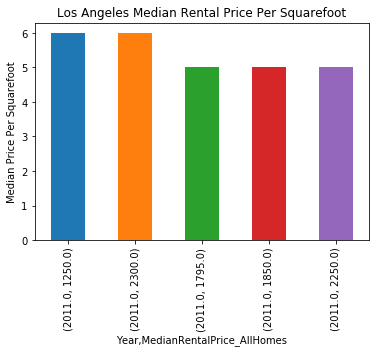

In [135]:
df_city_la_2017 = df_city_la[df_city_la['Year'] > 2010]

df_city_la.groupby(df_city_la_2017['Year'])['MedianRentalPrice_AllHomes'].value_counts().head(5).plot(kind='bar')
plt.title('Los Angeles Median Rental Price Per Squarefoot')
plt.ylabel('Median Price Per Squarefoot')


Questions: Correlation between rental price and sales price. Does increase of rental entice investors to buy?
Questions: What kind of houses are most resilient against economic downturn
(I am assuming that it will be single family house due to lack of family obligation(Hence they can cut down on their other cost. In addition, since their salaries are lower, they are probably less likely to be fired compared to a higher exec with high salary)